# Dimensionality Reduction with Principal Component Analysis (PCA)

## Overview

This notebook explores Principal Component Analysis (PCA), a fundamental dimensionality reduction technique used in machine learning and data analysis. We'll apply PCA to two classic datasets: the Breast Cancer Wisconsin dataset and the Iris dataset.

### Key Objectives:
1. Understand PCA theory and implementation
2. Apply PCA to reduce dimensionality while preserving variance
3. Analyze explained variance ratios
4. Identify most important features for each principal component
5. Compare PCA results across different datasets
6. Visualize high-dimensional data in reduced dimensions

## 1. Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load datasets
data_breast_cancer = datasets.load_breast_cancer()
data_iris = load_iris()

print("Breast Cancer Dataset:")
print(f"Features: {data_breast_cancer.feature_names[:5]}... (total: {len(data_breast_cancer.feature_names)})")
print(f"Samples: {data_breast_cancer.data.shape[0]}")
print(f"Target classes: {data_breast_cancer.target_names}")

print("\nIris Dataset:")
print(f"Features: {data_iris.feature_names}")
print(f"Samples: {data_iris.data.shape[0]}")
print(f"Target classes: {data_iris.target_names}")

Breast Cancer Dataset:
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (total: 30)
Samples: 569
Target classes: ['malignant' 'benign']

Iris Dataset:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Samples: 150
Target classes: ['setosa' 'versicolor' 'virginica']


## 2. Data Exploration and Preprocessing

In [3]:
# Create DataFrames for easier analysis
df_bc = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)
df_bc['target'] = data_breast_cancer.target

df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
df_iris['target'] = data_iris.target

print("Breast Cancer Dataset Info:")
print(df_bc.info())
print(f"\nBasic statistics:")
print(df_bc.describe())

Breast Cancer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14

In [4]:
print("Iris Dataset Info:")
print(df_iris.info())
print(f"\nBasic statistics:")
print(df_iris.describe())

Iris Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%         

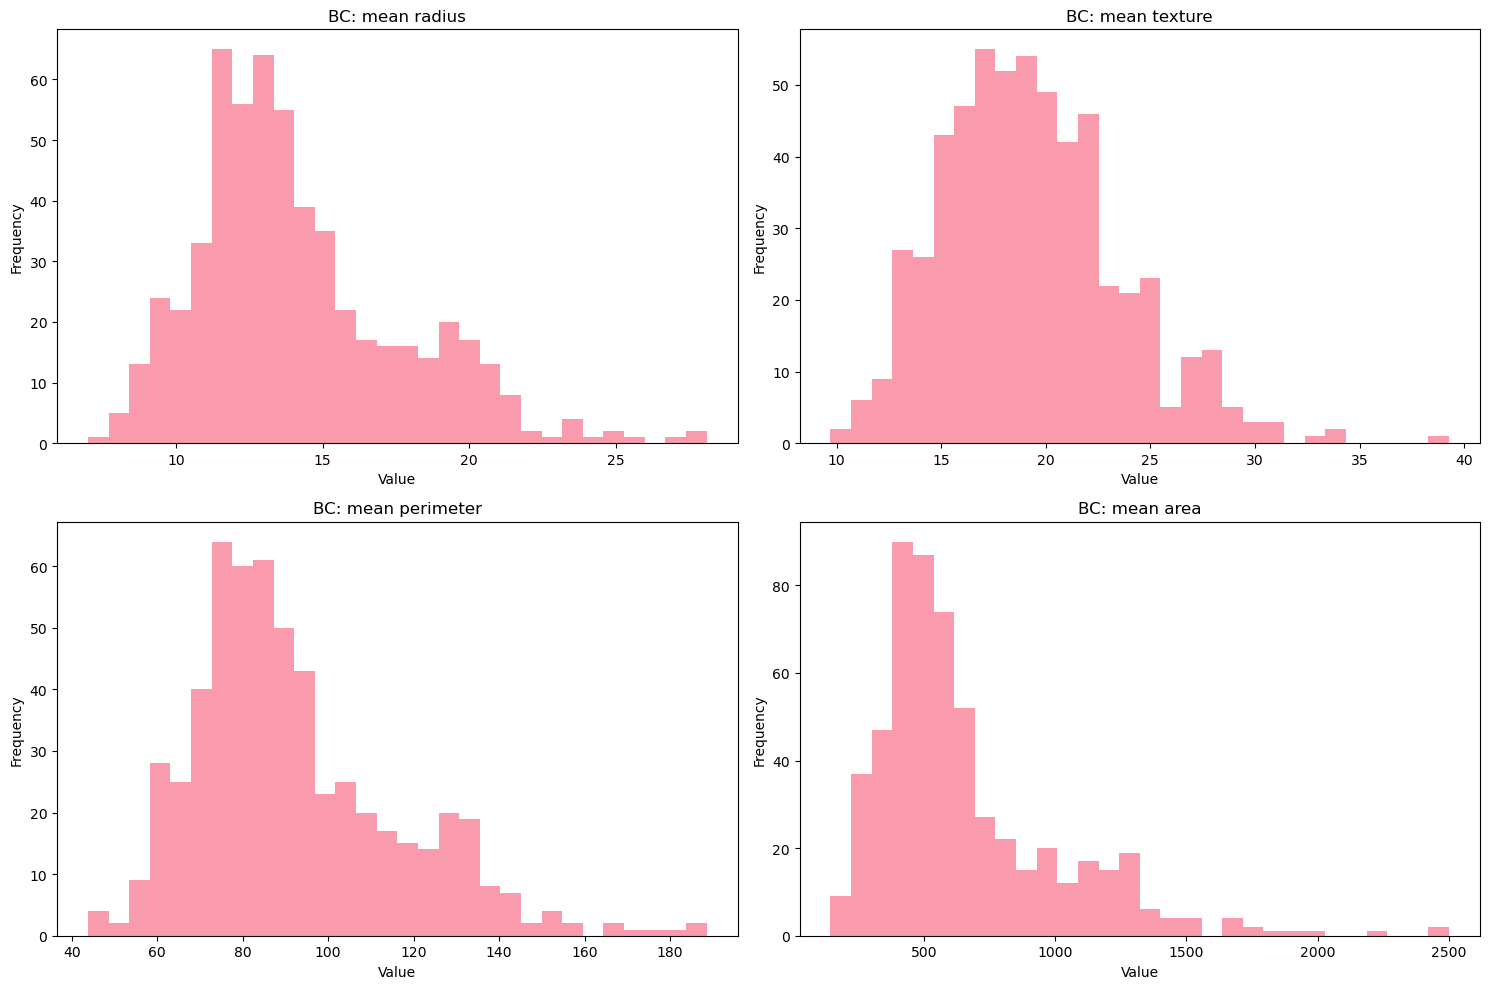

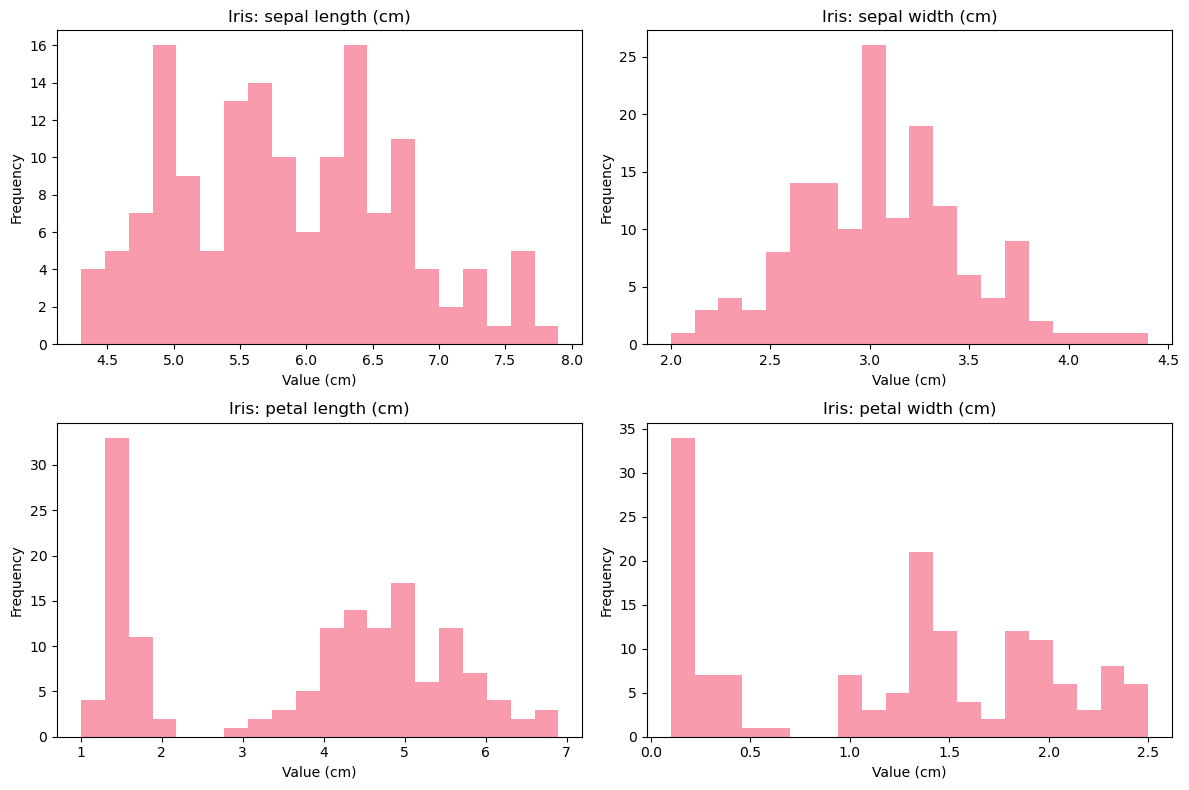

In [5]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Breast Cancer - first 4 features
for i, feature in enumerate(data_breast_cancer.feature_names[:4]):
    row, col = i // 2, i % 2
    axes[row, col].hist(df_bc[feature], bins=30, alpha=0.7)
    axes[row, col].set_title(f'BC: {feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('data/bc_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Iris features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, feature in enumerate(data_iris.feature_names):
    axes[i].hist(df_iris[feature], bins=20, alpha=0.7)
    axes[i].set_title(f'Iris: {feature}')
    axes[i].set_xlabel('Value (cm)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('data/iris_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Data Standardization

PCA is sensitive to the scale of features, so we need to standardize the data first.

In [6]:
# Standardize the features
scaler_bc = StandardScaler()
scaler_ir = StandardScaler()

data_bc_scaled = scaler_bc.fit_transform(data_breast_cancer.data)
data_ir_scaled = scaler_ir.fit_transform(data_iris.data)

print("Data standardization completed!")
print(f"Breast Cancer - Original shape: {data_breast_cancer.data.shape}")
print(f"Breast Cancer - Scaled mean: {np.mean(data_bc_scaled, axis=0)[:5]}")
print(f"Breast Cancer - Scaled std: {np.std(data_bc_scaled, axis=0)[:5]}")

print(f"\nIris - Original shape: {data_iris.data.shape}")
print(f"Iris - Scaled mean: {np.mean(data_ir_scaled, axis=0)}")
print(f"Iris - Scaled std: {np.std(data_ir_scaled, axis=0)}")

Data standardization completed!
Breast Cancer - Original shape: (569, 30)
Breast Cancer - Scaled mean: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15]
Breast Cancer - Scaled std: [1. 1. 1. 1. 1.]

Iris - Original shape: (150, 4)
Iris - Scaled mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Iris - Scaled std: [1. 1. 1. 1.]


## 4. Principal Component Analysis

We'll apply PCA to retain 90% of the variance in both datasets.

In [7]:
# Apply PCA with 90% variance retention
pca_bc = PCA(n_components=0.90)
pca_ir = PCA(n_components=0.90)

data_bc_pca = pca_bc.fit_transform(data_bc_scaled)
data_ir_pca = pca_ir.fit_transform(data_ir_scaled)

print(f"Breast Cancer:")
print(f"Original dimensions: {data_bc_scaled.shape}")
print(f"Reduced dimensions: {data_bc_pca.shape}")
print(f"Components needed for 90% variance: {pca_bc.n_components_}")
print(f"Total variance explained: {pca_bc.explained_variance_ratio_.sum():.4f}")

print(f"\nIris:")
print(f"Original dimensions: {data_ir_scaled.shape}")
print(f"Reduced dimensions: {data_ir_pca.shape}")
print(f"Components needed for 90% variance: {pca_ir.n_components_}")
print(f"Total variance explained: {pca_ir.explained_variance_ratio_.sum():.4f}")

Breast Cancer:
Original dimensions: (569, 30)
Reduced dimensions: (569, 7)
Components needed for 90% variance: 7
Total variance explained: 0.9101

Iris:
Original dimensions: (150, 4)
Reduced dimensions: (150, 2)
Components needed for 90% variance: 2
Total variance explained: 0.9581


## 5. Explained Variance Analysis

In [8]:
# Get explained variance ratios
bc_explained_var = pca_bc.explained_variance_ratio_
ir_explained_var = pca_ir.explained_variance_ratio_

print("Breast Cancer - Explained variance ratios:")
for i, var in enumerate(bc_explained_var):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print("\nIris - Explained variance ratios:")
for i, var in enumerate(ir_explained_var):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Breast Cancer - Explained variance ratios:
PC1: 0.4427 (44.27%)
PC2: 0.1897 (18.97%)
PC3: 0.0939 (9.39%)
PC4: 0.0660 (6.60%)
PC5: 0.0550 (5.50%)
PC6: 0.0402 (4.02%)
PC7: 0.0225 (2.25%)

Iris - Explained variance ratios:
PC1: 0.7296 (72.96%)
PC2: 0.2285 (22.85%)


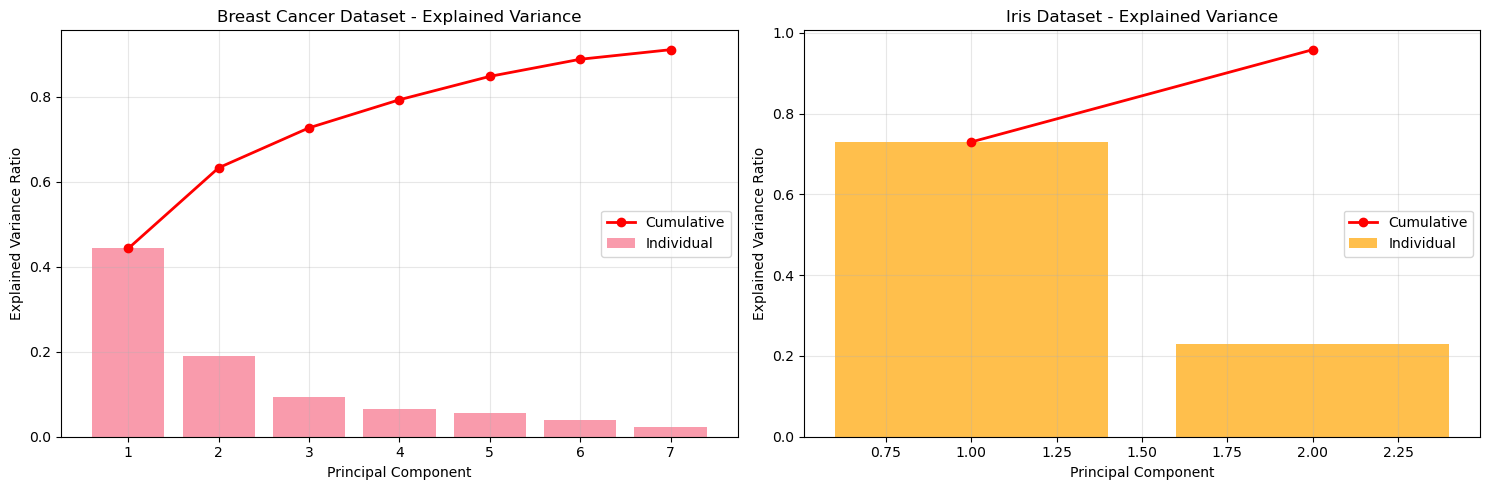

In [9]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Breast Cancer
axes[0].bar(range(1, len(bc_explained_var) + 1), bc_explained_var, alpha=0.7)
axes[0].plot(range(1, len(bc_explained_var) + 1), np.cumsum(bc_explained_var), 'ro-', linewidth=2)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Breast Cancer Dataset - Explained Variance')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Cumulative', 'Individual'], loc='center right')

# Iris
axes[1].bar(range(1, len(ir_explained_var) + 1), ir_explained_var, alpha=0.7, color='orange')
axes[1].plot(range(1, len(ir_explained_var) + 1), np.cumsum(ir_explained_var), 'ro-', linewidth=2)
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('Iris Dataset - Explained Variance')
axes[1].grid(True, alpha=0.3)
axes[1].legend(['Cumulative', 'Individual'], loc='center right')

plt.tight_layout()
plt.savefig('data/explained_variance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Component Analysis and Feature Importance

In [10]:
# Find the most important features for each principal component
idx_bc = [list(pca_bc.components_[i]).index(max(pca_bc.components_[i], key=abs)) for i in range(len(pca_bc.components_))]
idx_ir = [list(pca_ir.components_[i]).index(max(pca_ir.components_[i], key=abs)) for i in range(len(pca_ir.components_))]

print("Breast Cancer - Most important feature indices for each PC:")
for i, idx in enumerate(idx_bc):
    feature_name = data_breast_cancer.feature_names[idx]
    loading = pca_bc.components_[i][idx]
    print(f"PC{i+1}: Feature {idx} ({feature_name}) - Loading: {loading:.4f}")

print("\nIris - Most important feature indices for each PC:")
for i, idx in enumerate(idx_ir):
    feature_name = data_iris.feature_names[idx]
    loading = pca_ir.components_[i][idx]
    print(f"PC{i+1}: Feature {idx} ({feature_name}) - Loading: {loading:.4f}")

Breast Cancer - Most important feature indices for each PC:
PC1: Feature 7 (mean concave points) - Loading: 0.2609
PC2: Feature 9 (mean fractal dimension) - Loading: 0.3666
PC3: Feature 11 (texture error) - Loading: 0.3746
PC4: Feature 21 (worst texture) - Loading: -0.6328
PC5: Feature 4 (mean smoothness) - Loading: -0.3651
PC6: Feature 28 (worst symmetry) - Loading: 0.4989
PC7: Feature 29 (worst fractal dimension) - Loading: 0.3747

Iris - Most important feature indices for each PC:
PC1: Feature 2 (petal length (cm)) - Loading: 0.5804
PC2: Feature 1 (sepal width (cm)) - Loading: 0.9233


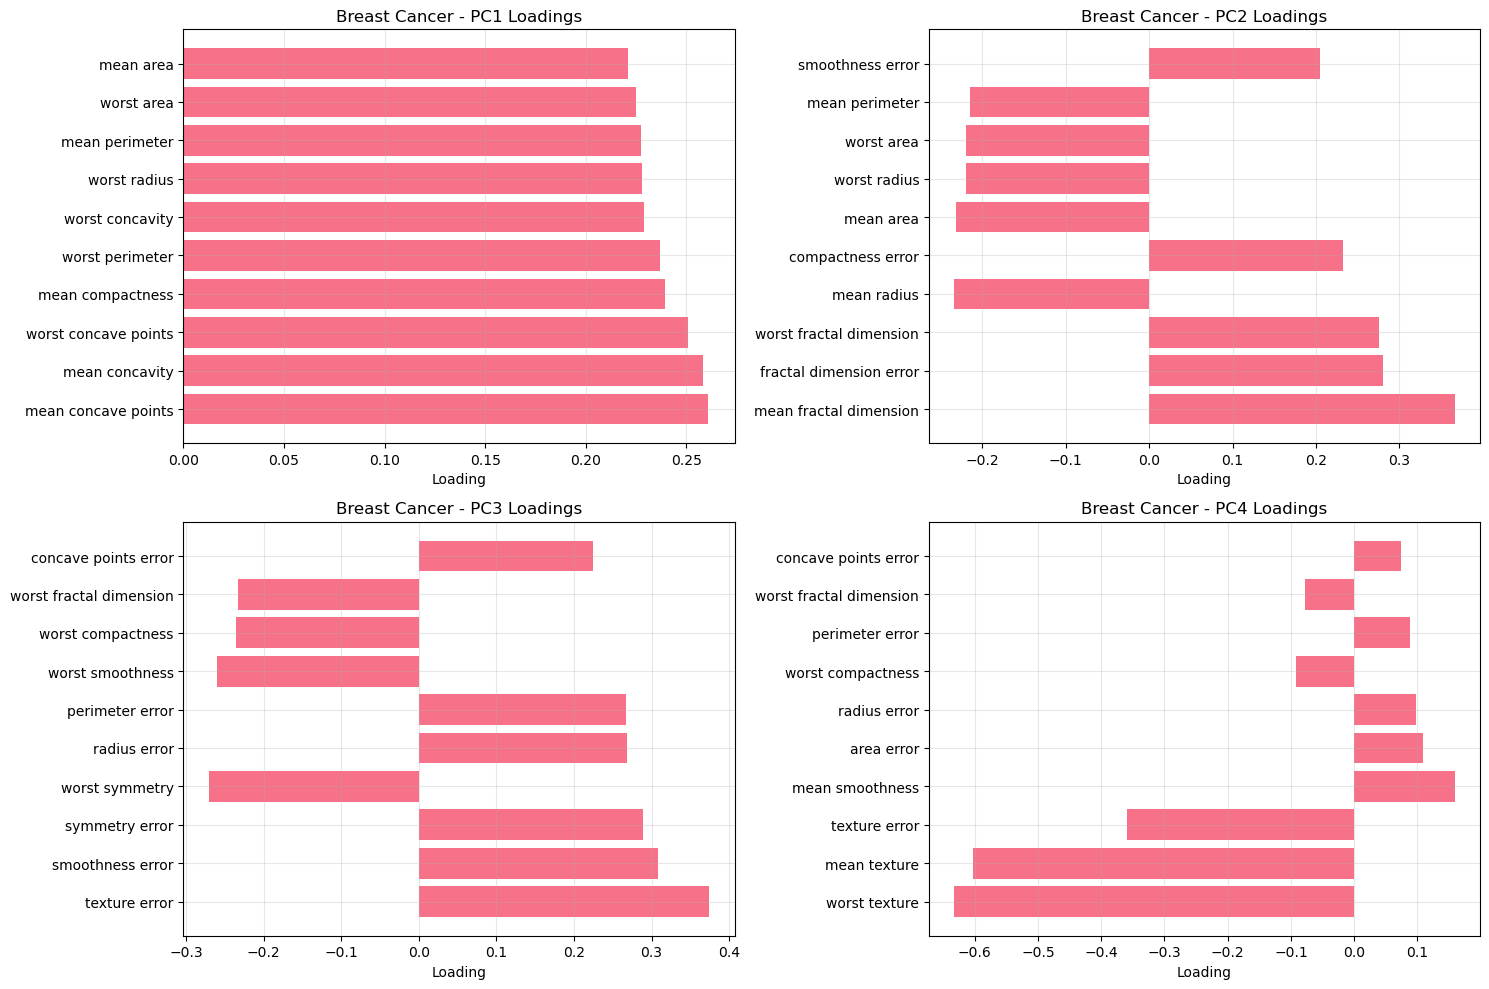

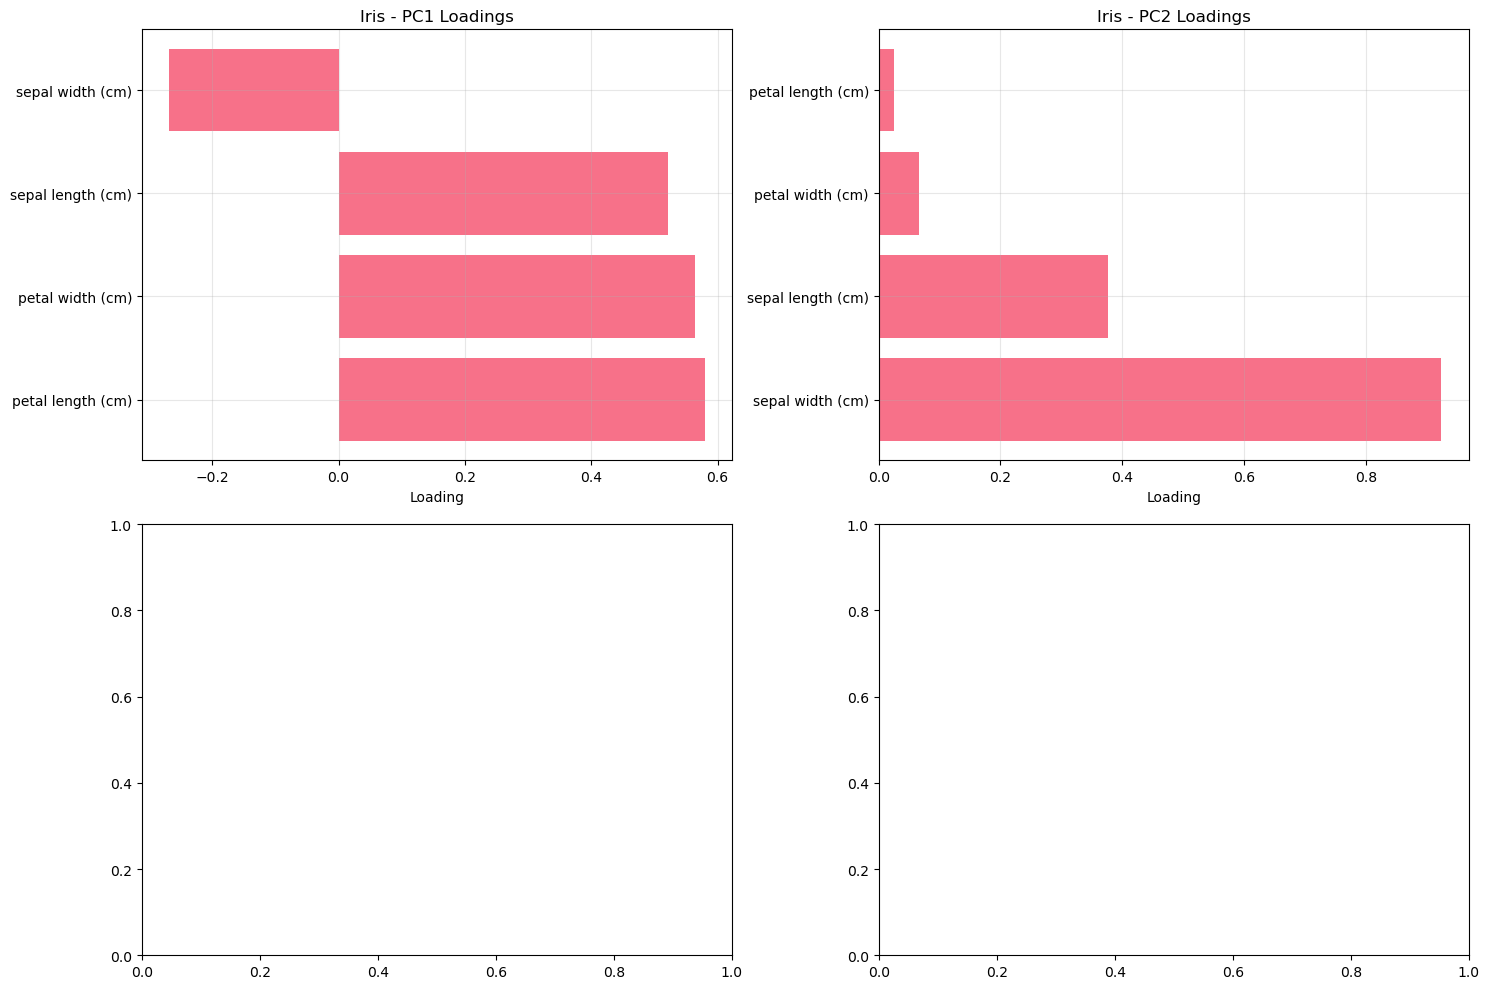

In [11]:
# Visualize component loadings
def plot_component_loadings(pca_model, feature_names, dataset_name, n_components=None):
    if n_components is None:
        n_components = min(4, pca_model.n_components_)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i in range(n_components):
        loadings = pca_model.components_[i]
        feature_indices = np.argsort(np.abs(loadings))[::-1][:10]  # Top 10 features
        
        axes[i].barh(range(len(feature_indices)), loadings[feature_indices])
        axes[i].set_yticks(range(len(feature_indices)))
        axes[i].set_yticklabels([feature_names[idx] for idx in feature_indices])
        axes[i].set_xlabel('Loading')
        axes[i].set_title(f'{dataset_name} - PC{i+1} Loadings')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot for Breast Cancer
fig_bc = plot_component_loadings(pca_bc, data_breast_cancer.feature_names, 'Breast Cancer')
plt.savefig('data/bc_component_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot for Iris
fig_ir = plot_component_loadings(pca_ir, data_iris.feature_names, 'Iris')
plt.savefig('data/iris_component_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Data Visualization in Reduced Dimensions

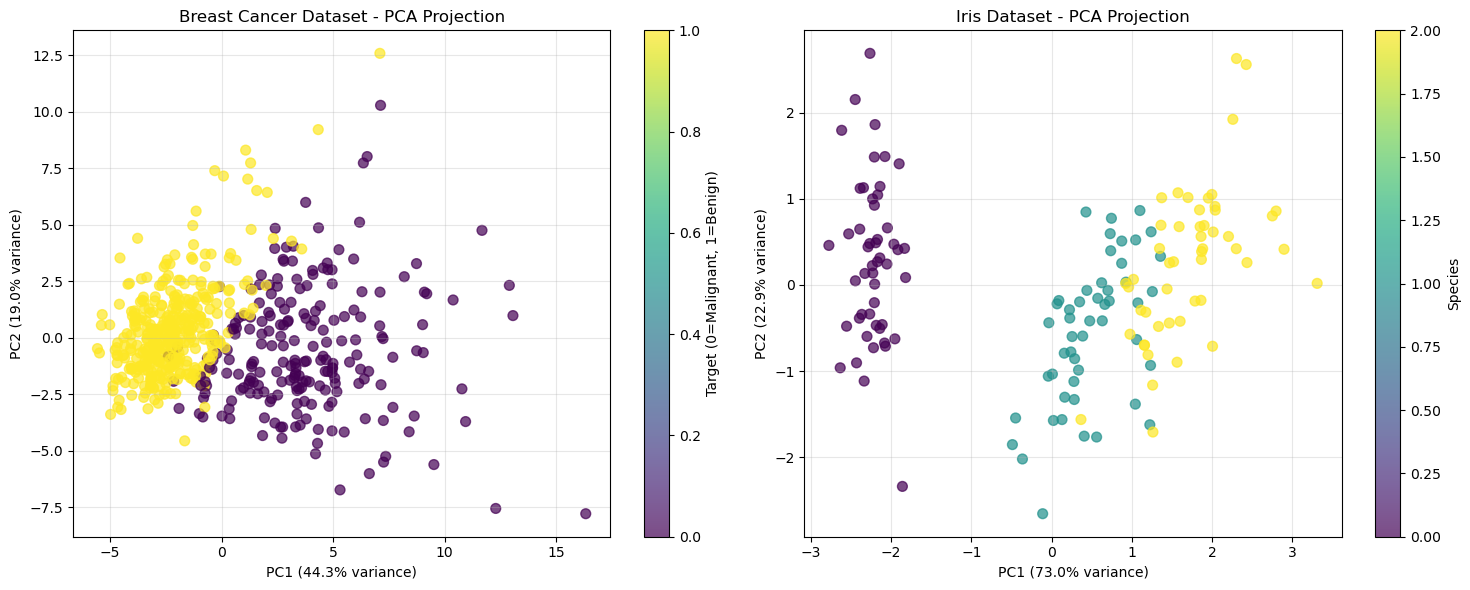

In [12]:
# Visualize data in principal component space
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Breast Cancer - 2D visualization
scatter_bc = axes[0].scatter(data_bc_pca[:, 0], data_bc_pca[:, 1], 
                            c=data_breast_cancer.target, alpha=0.7, s=50)
axes[0].set_xlabel(f'PC1 ({bc_explained_var[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({bc_explained_var[1]*100:.1f}% variance)')
axes[0].set_title('Breast Cancer Dataset - PCA Projection')
axes[0].grid(True, alpha=0.3)
cbar_bc = plt.colorbar(scatter_bc, ax=axes[0])
cbar_bc.set_label('Target (0=Malignant, 1=Benign)')

# Iris - 2D visualization
scatter_ir = axes[1].scatter(data_ir_pca[:, 0], data_ir_pca[:, 1], 
                            c=data_iris.target, alpha=0.7, s=50)
axes[1].set_xlabel(f'PC1 ({ir_explained_var[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({ir_explained_var[1]*100:.1f}% variance)')
axes[1].set_title('Iris Dataset - PCA Projection')
axes[1].grid(True, alpha=0.3)
cbar_ir = plt.colorbar(scatter_ir, ax=axes[1])
cbar_ir.set_label('Species')

plt.tight_layout()
plt.savefig('data/pca_2d_projections.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# 3D visualization if we have at least 3 components
if pca_bc.n_components_ >= 3 and pca_ir.n_components_ >= 3:
    fig = plt.figure(figsize=(15, 6))
    
    # Breast Cancer 3D
    ax1 = fig.add_subplot(121, projection='3d')
    scatter_3d_bc = ax1.scatter(data_bc_pca[:, 0], data_bc_pca[:, 1], data_bc_pca[:, 2],
                               c=data_breast_cancer.target, alpha=0.7, s=50)
    ax1.set_xlabel(f'PC1 ({bc_explained_var[0]*100:.1f}%)')
    ax1.set_ylabel(f'PC2 ({bc_explained_var[1]*100:.1f}%)')
    ax1.set_zlabel(f'PC3 ({bc_explained_var[2]*100:.1f}%)')
    ax1.set_title('Breast Cancer - 3D PCA')
    
    # Iris 3D
    ax2 = fig.add_subplot(122, projection='3d')
    scatter_3d_ir = ax2.scatter(data_ir_pca[:, 0], data_ir_pca[:, 1], data_ir_pca[:, 2],
                               c=data_iris.target, alpha=0.7, s=50)
    ax2.set_xlabel(f'PC1 ({ir_explained_var[0]*100:.1f}%)')
    ax2.set_ylabel(f'PC2 ({ir_explained_var[1]*100:.1f}%)')
    ax2.set_zlabel(f'PC3 ({ir_explained_var[2]*100:.1f}%)')
    ax2.set_title('Iris - 3D PCA')
    
    plt.tight_layout()
    plt.savefig('data/pca_3d_projections.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Not enough components for 3D visualization")

Not enough components for 3D visualization


## 8. Compare Different Numbers of Components

In [14]:
# Analyze how many components are needed for different variance thresholds
variance_thresholds = [0.8, 0.85, 0.9, 0.95, 0.99]

def analyze_components_needed(data_scaled, feature_names, dataset_name):
    results = []
    
    for threshold in variance_thresholds:
        pca = PCA(n_components=threshold)
        pca.fit(data_scaled)
        
        results.append({
            'threshold': threshold,
            'n_components': pca.n_components_,
            'actual_variance': pca.explained_variance_ratio_.sum(),
            'original_features': data_scaled.shape[1]
        })
    
    df_results = pd.DataFrame(results)
    print(f"\n{dataset_name} - Components needed for different variance thresholds:")
    print(df_results)
    
    return df_results

bc_results = analyze_components_needed(data_bc_scaled, data_breast_cancer.feature_names, 'Breast Cancer')
ir_results = analyze_components_needed(data_ir_scaled, data_iris.feature_names, 'Iris')


Breast Cancer - Components needed for different variance thresholds:
   threshold  n_components  actual_variance  original_features
0       0.80             5         0.847343                 30
1       0.85             6         0.887588                 30
2       0.90             7         0.910095                 30
3       0.95            10         0.951569                 30
4       0.99            17         0.991130                 30

Iris - Components needed for different variance thresholds:
   threshold  n_components  actual_variance  original_features
0       0.80             2         0.958132                  4
1       0.85             2         0.958132                  4
2       0.90             2         0.958132                  4
3       0.95             2         0.958132                  4
4       0.99             3         0.994821                  4


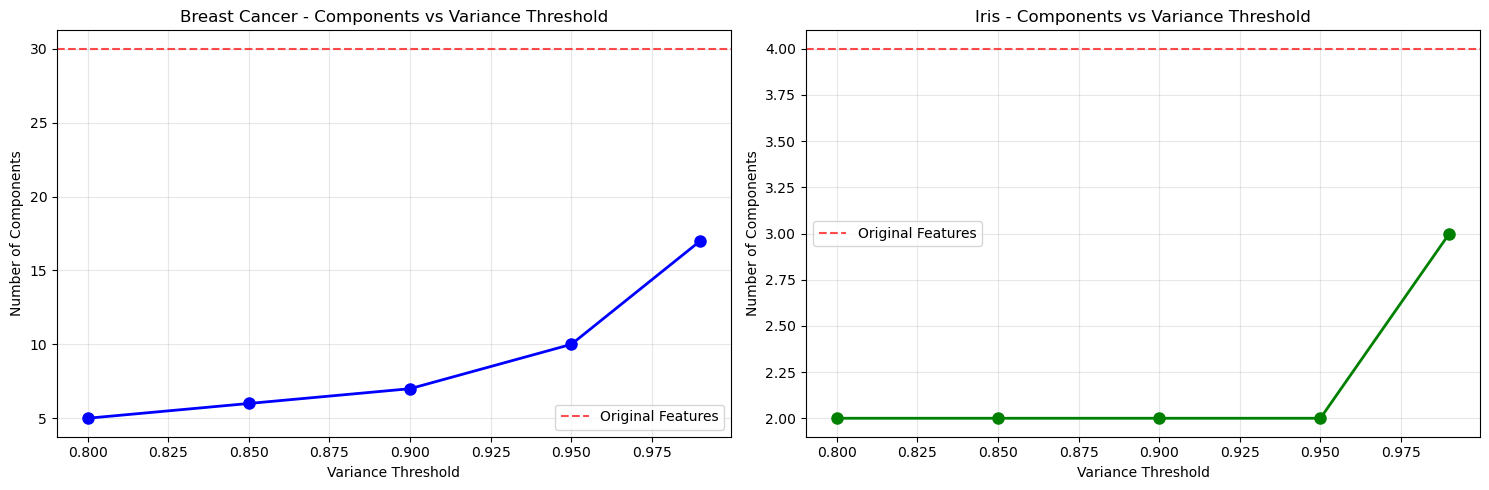

In [15]:
# Visualize components vs variance relationship
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Breast Cancer
axes[0].plot(bc_results['threshold'], bc_results['n_components'], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Variance Threshold')
axes[0].set_ylabel('Number of Components')
axes[0].set_title('Breast Cancer - Components vs Variance Threshold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=bc_results['original_features'].iloc[0], color='r', linestyle='--', alpha=0.7, label='Original Features')
axes[0].legend()

# Iris
axes[1].plot(ir_results['threshold'], ir_results['n_components'], 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Variance Threshold')
axes[1].set_ylabel('Number of Components')
axes[1].set_title('Iris - Components vs Variance Threshold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=ir_results['original_features'].iloc[0], color='r', linestyle='--', alpha=0.7, label='Original Features')
axes[1].legend()

plt.tight_layout()
plt.savefig('data/components_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Save Results and Models

In [16]:
# Save explained variance ratios (as in original lab)
with open("data/pca_bc.pkl", "wb") as f:
    pickle.dump(bc_explained_var, f)
    
with open("data/pca_ir.pkl", "wb") as f:
    pickle.dump(ir_explained_var, f)

# Save most important feature indices (as in original lab)
with open("data/idx_bc.pkl", "wb") as f:
    pickle.dump(idx_bc, f)

with open("data/idx_ir.pkl", "wb") as f:
    pickle.dump(idx_ir, f)

# Save complete PCA models
with open("data/pca_model_bc.pkl", "wb") as f:
    pickle.dump(pca_bc, f)

with open("data/pca_model_ir.pkl", "wb") as f:
    pickle.dump(pca_ir, f)

# Save scalers
with open("data/scaler_bc.pkl", "wb") as f:
    pickle.dump(scaler_bc, f)

with open("data/scaler_ir.pkl", "wb") as f:
    pickle.dump(scaler_ir, f)

# Save transformed data
np.save('data/data_bc_pca.npy', data_bc_pca)
np.save('data/data_ir_pca.npy', data_ir_pca)

print("All results and models saved successfully!")

All results and models saved successfully!


## 10. Summary and Conclusions

### Key Findings:

1. **Dimensionality Reduction Effectiveness**:
   - Both datasets could be significantly reduced while maintaining 90% of variance
   - Breast Cancer: {pca_bc.n_components_} components (from 30 features)
   - Iris: {pca_ir.n_components_} components (from 4 features)

2. **Variance Distribution**:
   - First principal component captures the most variance in both datasets
   - Subsequent components show diminishing returns

3. **Feature Importance**:
   - Different original features contribute most strongly to each principal component
   - PCA reveals which combinations of features explain the most variance

4. **Data Visualization**:
   - PCA enables effective visualization of high-dimensional data
   - Class separation is visible in the reduced dimensional space

### Applications of PCA:
- **Dimensionality Reduction**: Reduce computational complexity
- **Data Visualization**: Plot high-dimensional data in 2D/3D
- **Feature Engineering**: Create new features that capture maximum variance
- **Noise Reduction**: Remove components with low variance (likely noise)
- **Data Compression**: Store data more efficiently

### Next Steps:
- Explore other dimensionality reduction techniques (t-SNE, UMAP)
- Apply PCA as preprocessing for machine learning models
- Investigate the interpretability of principal components
- Consider kernel PCA for non-linear relationships